In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Extract 25088 Visual Features

##VGG16
Load VGG16 Model For Transfer Learning
Using as feature extractor

In [ ]:
# %tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras import models
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import regularizers

###VGG16 model pre-trained on ImageNet Dataset

In [ ]:
vgg16 = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
vgg16.trainable = False
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vgg16 = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
vgg16.trainable = False
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add()
print(model.summary())

58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________
None


###VGG16 model pre-trained on ImageNet1000 and Palace365 Dataset

In [ ]:
model = Sequential()
#block 1
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002),input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(MaxPooling2D((2,2),(2,2)))
#block 2
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(MaxPooling2D((2,2),(2,2)))
#block 3
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(MaxPooling2D((2,2),(2,2)))
#block 4
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(MaxPooling2D((2,2),(2,2)))
#block 5
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',kernel_regularizer=regularizers.l2(0.0002)))
model.add(MaxPooling2D((2,2),(2,2)))
#FC layers
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1365,activation='softmax'))
#Weights
model.load_weights('../model/CNN-based_Visual_Model/VGG16/vgg16-hybrid1365_weights_tf_dim_ordering_tf_kernels.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)      

In [ ]:
#tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

##Feature Extraction

In [ ]:
def load_image(image_path):
  img = load_img(image_path,target_size=(224,224))
  x = img_to_array(img)
  x = np.expand_dims(x,axis=0)
  x = preprocess_input(x)
  return x
  
def extract_feature(file_path):
  keyfs = os.listdir(file_path)
  keyfs =  sorted(keyfs)
  n = len(keyfs)
  output = []
  for i in range(n):
    image_path = os.path.join(file_path,keyfs[i])
    x = load_image(image_path)
    output.append(model.predict(x))
  #output = np.mean(output,axis=0)
  output = np.array(output)
  output = np.squeeze(output, axis=1)
  print(output.shape)
  return output

def load_txt(feature_path):
  f = np.loadtxt(feature_path)
  f = np.expand_dims(f,axis=0)
  return f

def Diff(li1, li2):
    return (list(list(set(li1)-set(li2))))

def main(data_path,feature_path):
  #Keyframe data path
  DS_Store = os.path.join(data_path,'.DS_Store')
  if os.path.exists(DS_Store):
    os.remove(DS_Store)
  f = os.listdir(data_path)
  #Extracted feature path
  done_f = os.listdir(feature_path)
  done = []
  for d in done_f:
    d = d.replace('.txt','')
    done.append(d)
  res = Diff(f,done)
  print(len(res))
  for i in res:
    f_path = os.path.join(data_path,i)
    print(f_path)
    DS_Store = os.path.join(f_path,'.DS_Store')
    if os.path.exists(DS_Store):
      os.remove(DS_Store)
    feature = extract_feature(f_path)
    output_path = os.path.join(feature_path,i)
    output_path = output_path + '.txt'
    np.savetxt(output_path, feature)

In [ ]:
#extract visual 25088 features
import zipfile
with zipfile.ZipFile('../data/Movie_Trailer_Dataset/86_movie/8_movie/8_movie_keyframe.zip', 'r') as zip_ref:
    zip_ref.extractall('Data')

keyframe_path = '/content/Data/8_movie_keyframe'
feature_path = '../data/Movie_Trailer_Dataset/86_movie/8_movie/8_movie_25088feature'

main(keyframe_path,feature_path)

8
/content/Data/movie_keyframe/SherlockHolmes
(4126, 25088)
/content/Data/movie_keyframe/PulpFiction
(3471, 25088)
/content/Data/movie_keyframe/Amelie
(3860, 25088)
/content/Data/movie_keyframe/Matrix
(6480, 25088)
/content/Data/movie_keyframe/AliceInWonderland
(5000, 25088)
/content/Data/movie_keyframe/LifeofPi
(3723, 25088)
/content/Data/movie_keyframe/Streetdance
(6344, 25088)
/content/Data/movie_keyframe/Pirate
(7473, 25088)


##Visualize feature maps example

In [ ]:
image_path = 'Data/2019_keyframe/1Vnghdsjmd0/shot_0023_img_1.jpg'

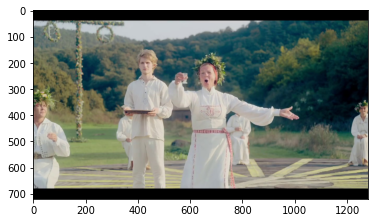

In [ ]:
image = load_img(image_path)
plt.imshow(image)

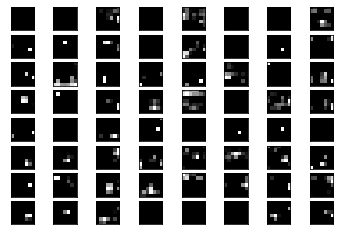

In [ ]:
def load_image(image_path):
  img = load_img(image_path,target_size=(224,224))
  x = img_to_array(img)
  x = np.expand_dims(x,axis=0)
  x = preprocess_input(x)
  return x

img = load_image(image_path)
feature_maps = model.predict(img)
square = 8
for fmap in feature_maps:
	ix = 1
	for _ in range(square):
		for _ in range(square):
			ax = plt.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			plt.imshow(fmap[ :, :, ix-1], cmap='gray')
			ix += 1
	plt.show()

#Feature Extraction using pre-trained visual model

In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing import sequence
import os
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Conv2D, MaxPool2D, Activation, LSTM
from tensorflow.keras.models import Model, load_model, Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint
import PIL
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import tempfile
import matplotlib as mpl
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#load model
model_path = '../model/CNN-based_Visual_Model/Model_Weight/13K_genre_classifier'
classifier = Sequential(name='classifier')
classifier = load_model(model_path)
classifier.trainable = False
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 4096)              102764544 
_________________________________________________________________
dense_26 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dropout_15 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 1024)              4195328   
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)             

In [ ]:
{i: v for i, v in enumerate(classifier.layers)}

{0: <tensorflow.python.keras.layers.core.Dense at 0x7f966e279b50>,
 1: <tensorflow.python.keras.layers.core.Dense at 0x7f962002a910>,
 2: <tensorflow.python.keras.layers.core.Dropout at 0x7f9620039550>,
 3: <tensorflow.python.keras.layers.core.Dense at 0x7f9620039e50>,
 4: <tensorflow.python.keras.layers.core.Dropout at 0x7f9620045a10>,
 5: <tensorflow.python.keras.layers.core.Dense at 0x7f9620048390>,
 6: <tensorflow.python.keras.layers.core.Dropout at 0x7f9620048fd0>,
 7: <tensorflow.python.keras.layers.core.Dense at 0x7f962004d8d0>}

In [ ]:
visual_model = Model(inputs=classifier.inputs, outputs=classifier.layers[5].output)

In [ ]:
movie_dir = '../data/86_movie/78_movie/78_movie_25088feature'
out_feature = '../data/86_movie/78_movie/78_movie_1024feature'
annotation_path = '../data/data_annotation/39_movie_pyteri/anno'
f2=os.listdir(annotation_path)
f2_n = []
for i in f2:
  t = i.replace('.json','.txt')
  f2_n.append(t)

In [ ]:
for f in f2_n:
  path = os.path.join(movie_dir,f)
  if os.path.exists(path):
    x = np.loadtxt(path)
    y = visual_model.predict(x)
    print(y.shape)
    save_path = os.path.join(out_feature,f)
    np.savetxt(save_path,y)
  else:
    print('the feature does not find:',f)

(4404, 1024)
(4485, 1024)
(4731, 1024)
(4092, 1024)
(4470, 1024)
(4143, 1024)
(4878, 1024)
(4650, 1024)
(4080, 1024)
(4962, 1024)
(4803, 1024)
(4923, 1024)
(4482, 1024)
(4311, 1024)
(4329, 1024)
(4239, 1024)
(4434, 1024)
(4989, 1024)
(4260, 1024)
(4992, 1024)
(4146, 1024)
(4299, 1024)
(4374, 1024)
(4992, 1024)
(4887, 1024)
(4323, 1024)
(4083, 1024)
(4308, 1024)
(4608, 1024)
(4539, 1024)
(4563, 1024)
(4311, 1024)
(4341, 1024)
(4488, 1024)
(4134, 1024)
(4230, 1024)
(4293, 1024)
(4017, 1024)
(4965, 1024)
